In [1]:
# we are working on income prediction problem associated with the adult income census dataset.
# The goal is toaccuratly predict wheater or not a person is making more or less than $50000 a year.

In [2]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [3]:
data = pd.read_csv("adult.csv")

In [4]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
data.shape

(32561, 15)

In [6]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [7]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
# check null values in our complete dataset
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
# check the duplicate value in a dataset
data.duplicated().sum()

24

In [11]:
#drop duplicated value from data
data.drop_duplicates(inplace=True)

In [12]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
# seperating categorical and numerical features
categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns

In [14]:
categorical_features 

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [15]:
numerical_features

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [16]:
data['workclass'].value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [17]:
data['education'].value_counts()

education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64

### fetch the unique values from categorical data
for i in categorical_features:
    print(i,data[i].unique())
    print()
    print("------------------------------------------------seperated columns-----------------------------------")

### fetch the unique values from categorical data
for i in categorical_features:
    print(i,data[i].unique())
    print()
    print("------------------------------------------------seperated columns-----------------------------------")

### fetch the unique values from categorical data
for i in categorical_features:
    print(i,data[i].unique())
    print()
    print("------------------------------------------------seperated columns-----------------------------------")

In [22]:
# remove ? and repalce with mode value .mode()
data["workclass"] = data["workclass"].replace("?","Private")
data["occupation"] = data["occupation"].replace("?","Prof-speciality")
data["native_country"] = data["native.country"].replace("?","United-States")

In [23]:
#DATA VIZUALIZATION

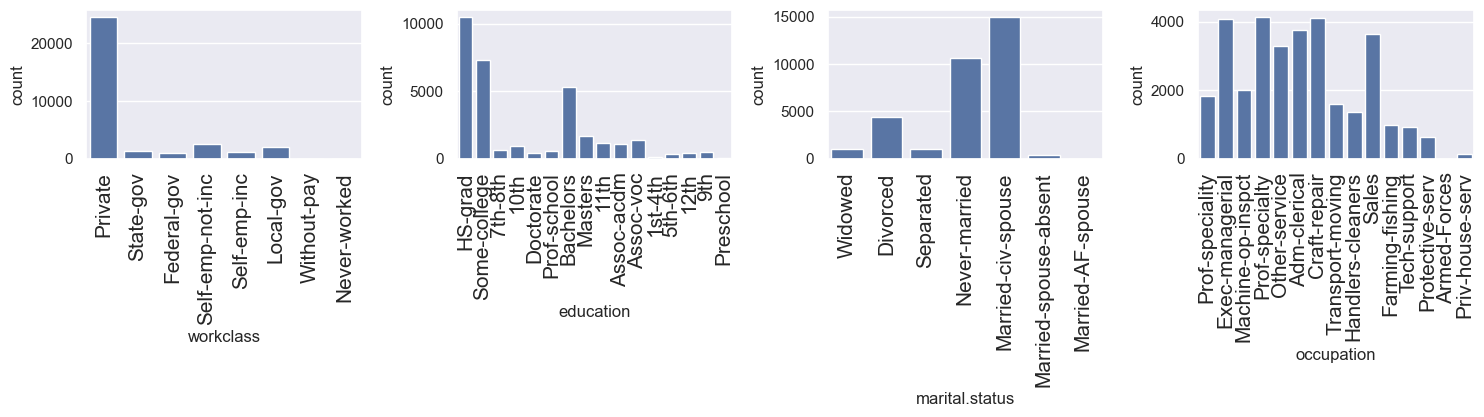

In [24]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,6)})

column1 = ['workclass','education','marital.status','occupation']

for i in range(0,len(column1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[column1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

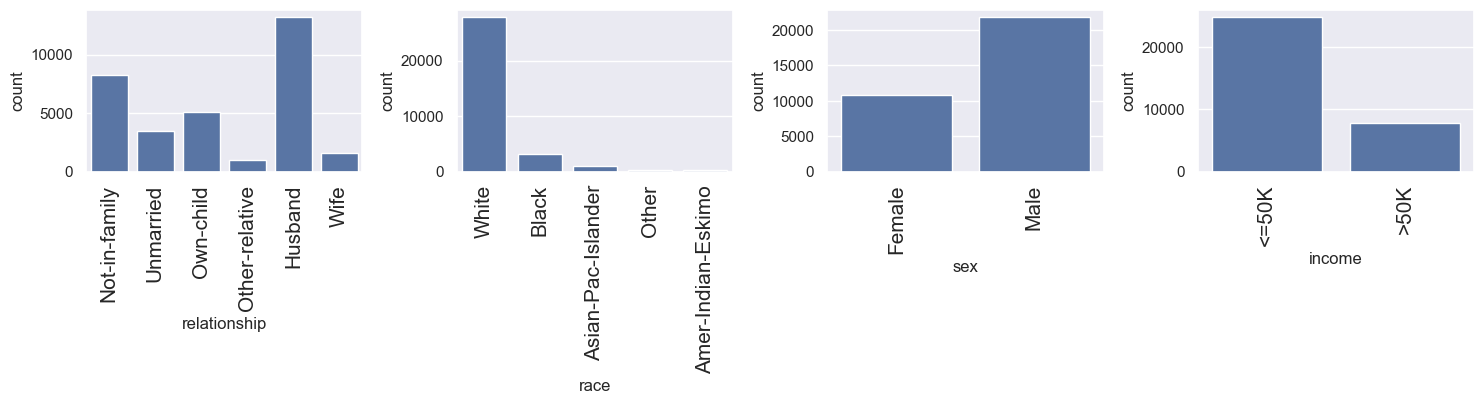

In [25]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,6)})

column1 = ['relationship', 'race', 'sex',  'income']

for i in range(0,len(column1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[column1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

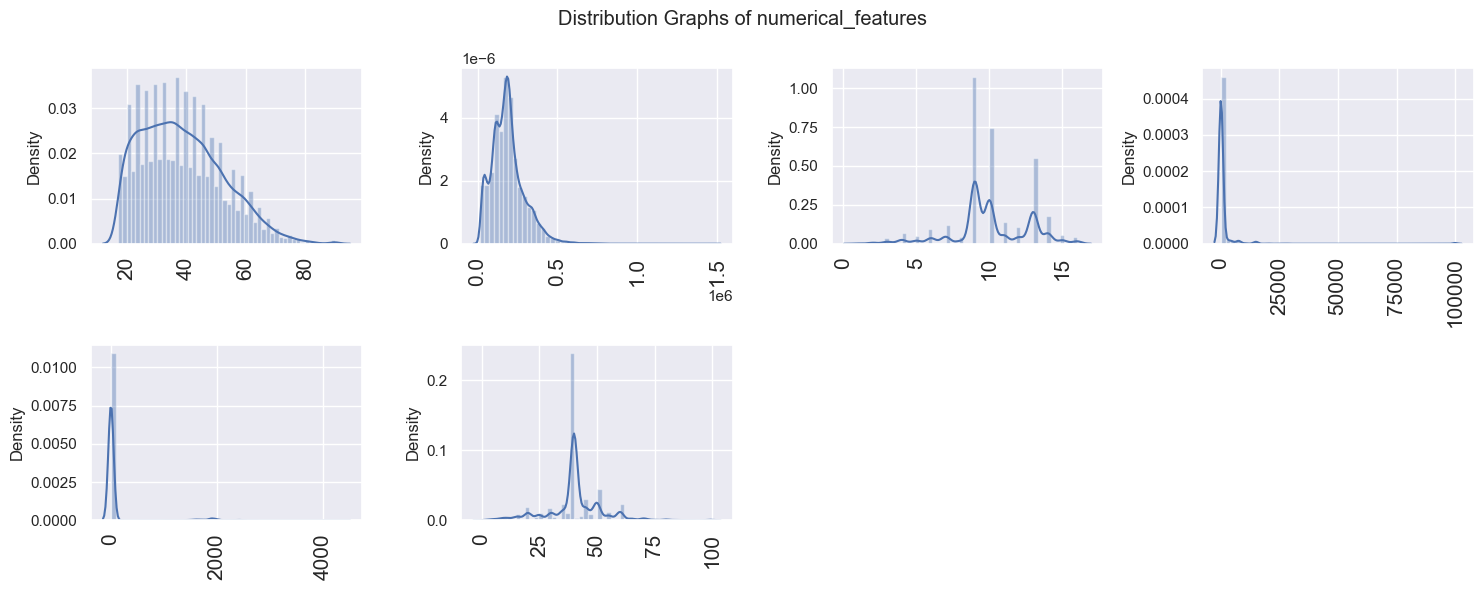

In [26]:
plt.suptitle("Distribution Graphs of numerical_features")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.distplot(x=data[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()
    

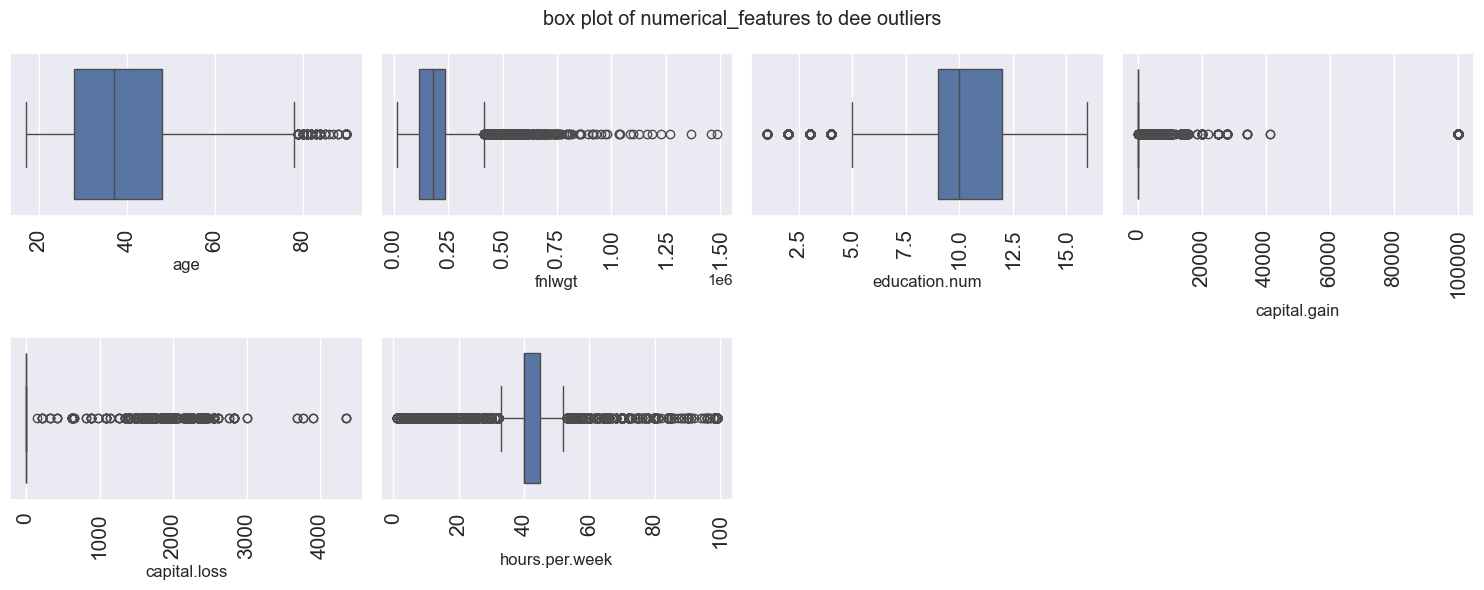

In [27]:
plt.suptitle("box plot of numerical_features to dee outliers")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=data[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()
    

In [28]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,native_country
0,90,Private,77053,HS-grad,9,Widowed,Prof-speciality,Not-in-family,White,Female,0,4356,40,United-States,<=50K,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-speciality,Unmarried,Black,Female,0,4356,40,United-States,<=50K,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,United-States


<Axes: xlabel='income'>

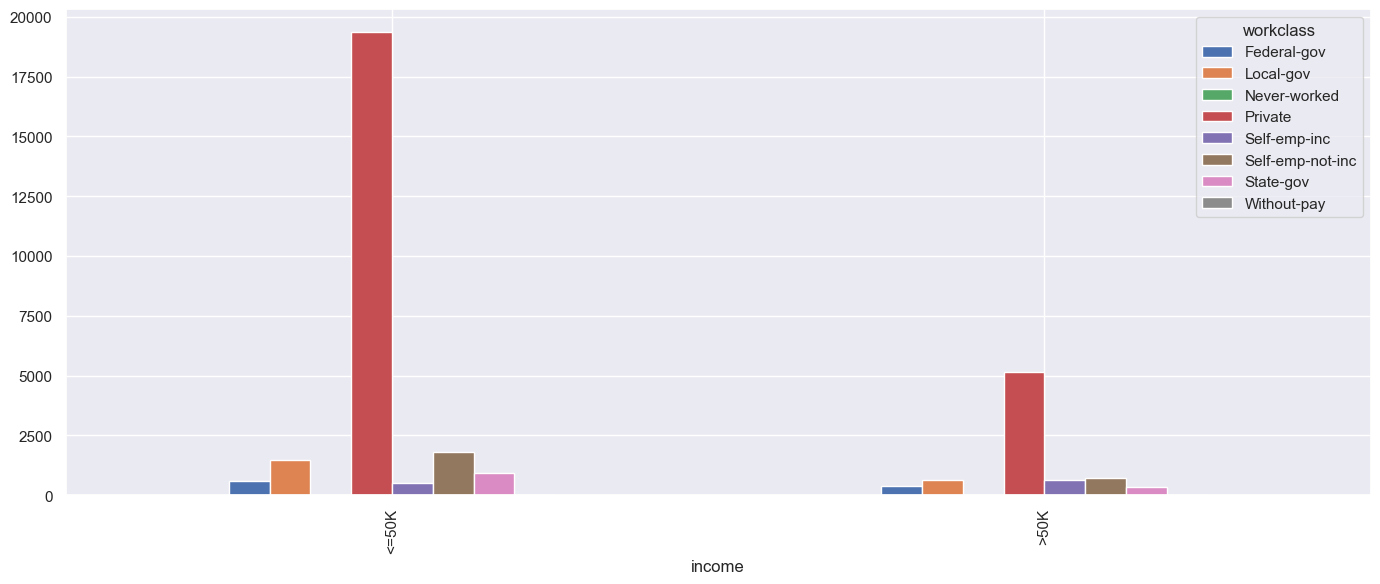

In [29]:
salary = pd.crosstab(data['income'],data['workclass'])
salary.plot(kind='bar')

<Axes: xlabel='income'>

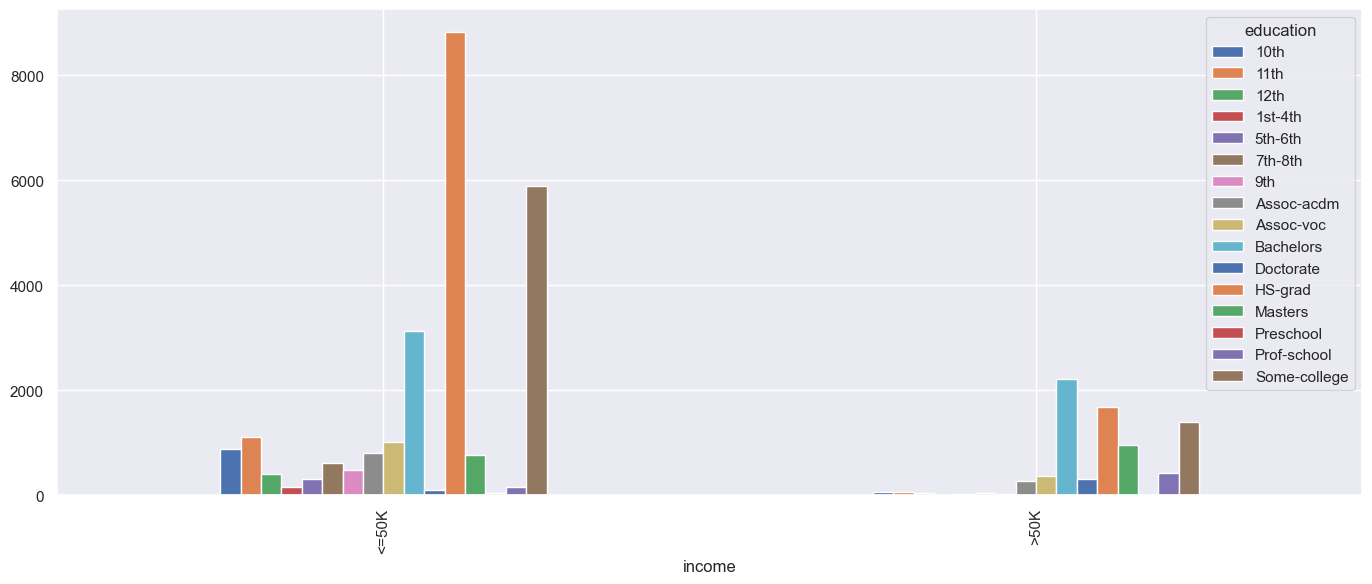

In [30]:
salary = pd.crosstab(data['income'],data['education'])
salary.plot(kind='bar')

<Axes: xlabel='income'>

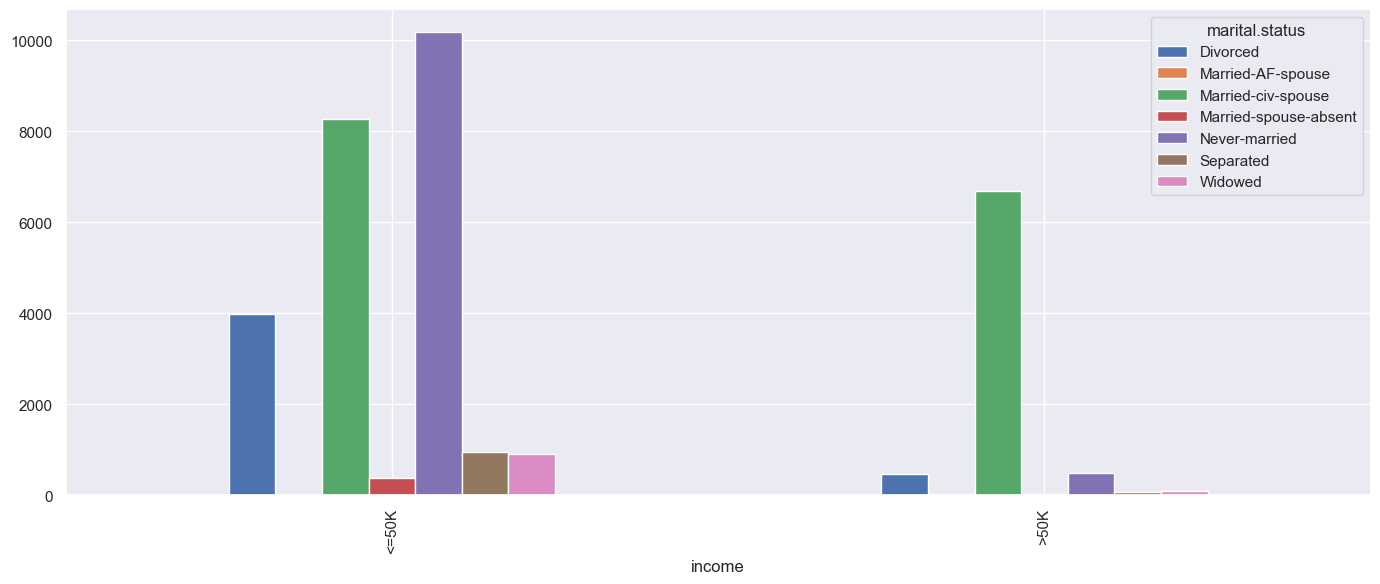

In [31]:
salary = pd.crosstab(data['income'],data['marital.status'])
salary.plot(kind='bar')

<Axes: xlabel='income'>

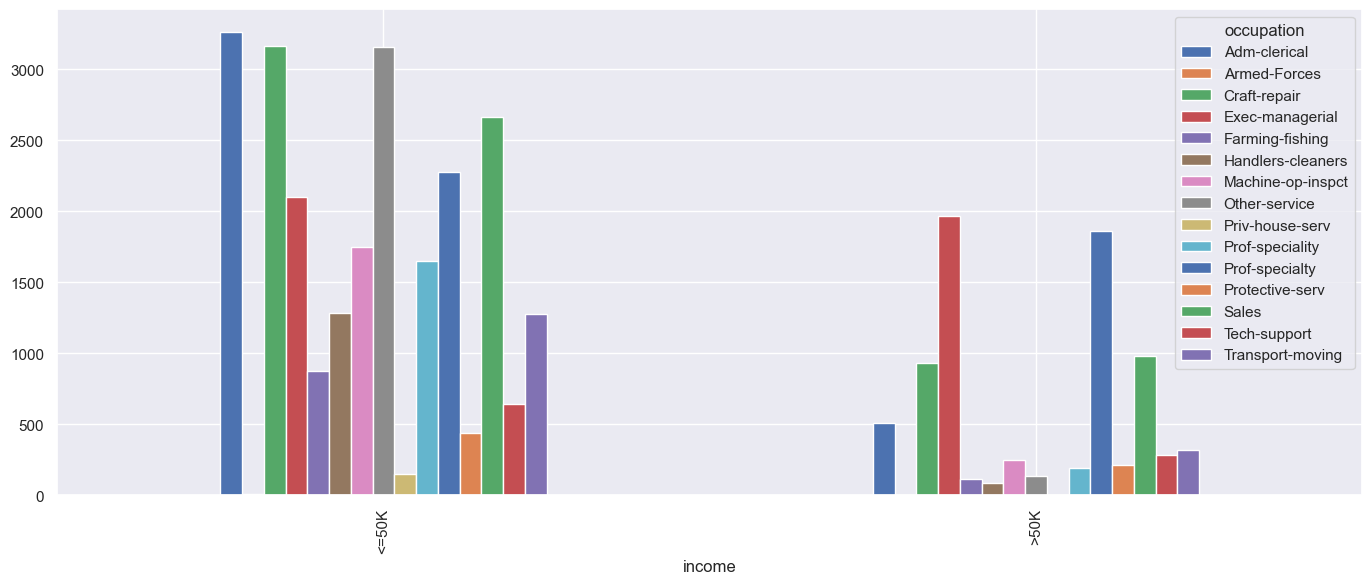

In [32]:
salary = pd.crosstab(data['income'],data['occupation'])
salary.plot(kind='bar')

<Axes: xlabel='income'>

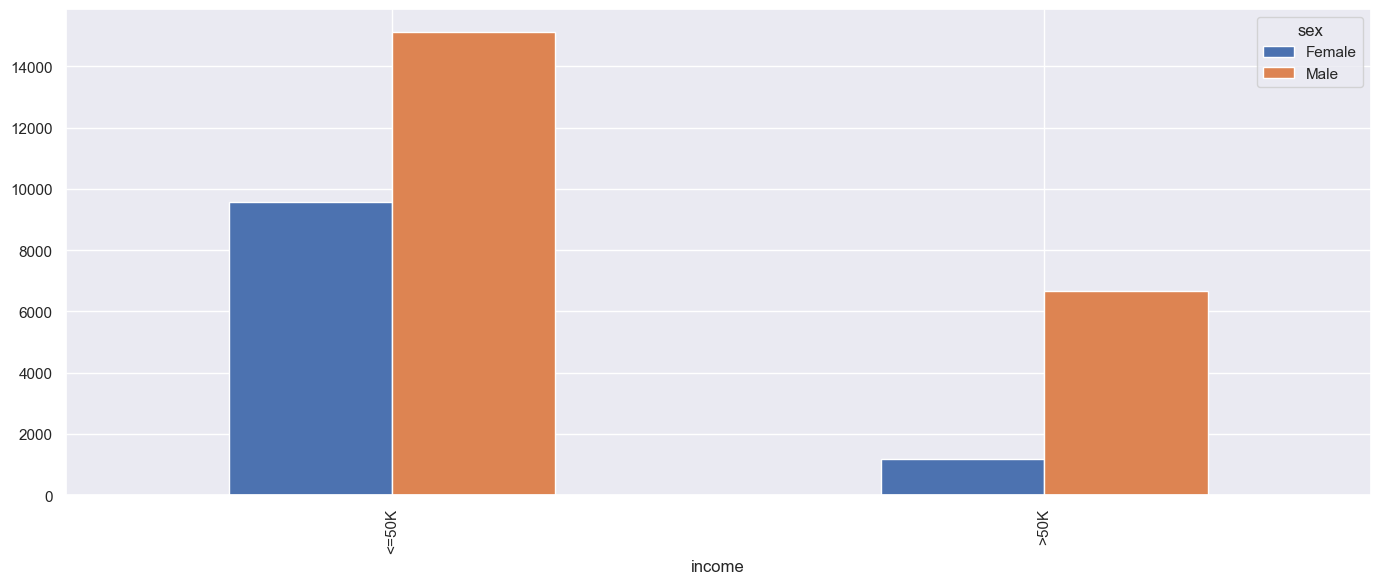

In [33]:
salary = pd.crosstab(data['income'],data['sex'])
salary.plot(kind='bar')

In [34]:
categorical_features

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [35]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,native_country
0,90,Private,77053,HS-grad,9,Widowed,Prof-speciality,Not-in-family,White,Female,0,4356,40,United-States,<=50K,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-speciality,Unmarried,Black,Female,0,4356,40,United-States,<=50K,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,United-States


In [36]:
# preprocessing

In [37]:
from sklearn.preprocessing import LabelEncoder

# creating a labelencoder object
le = LabelEncoder()

# define the categorical_features
categorical_features = ['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country']

# loop through the categorical features and encode them
for features in categorical_features:
    le.fit(data[features])
    data[features] = le.transform(data[features])

In [38]:
data["income"] = data["income"].map({'<=50K':0,'>50K':1})

In [39]:
sns.heatmap(data.corr(),annot=True)

ValueError: could not convert string to float: 'United-States'

In [48]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,native_country
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,39,0,United-States
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,39,0,United-States
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,39,0,United-States
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,39,0,United-States
4,41,3,264663,15,10,5,10,3,4,0,0,3900,40,39,0,United-States


In [50]:
data['income'].value_counts()

income
0    24698
1     7839
Name: count, dtype: int64

In [52]:
#dropping education_num column because we have education original encoded one
data.drop(["education","fnlwgt","native_country"],axis = 1,inplace = True)

In [54]:
data.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,9,6,9,1,4,0,0,4356,40,39,0
1,82,3,9,6,3,1,4,0,0,4356,18,39,0
2,66,3,10,6,9,4,2,0,0,4356,40,39,0
3,54,3,4,0,6,4,4,0,0,3900,40,39,0
4,41,3,10,5,10,3,4,0,0,3900,40,39,0


<Axes: >

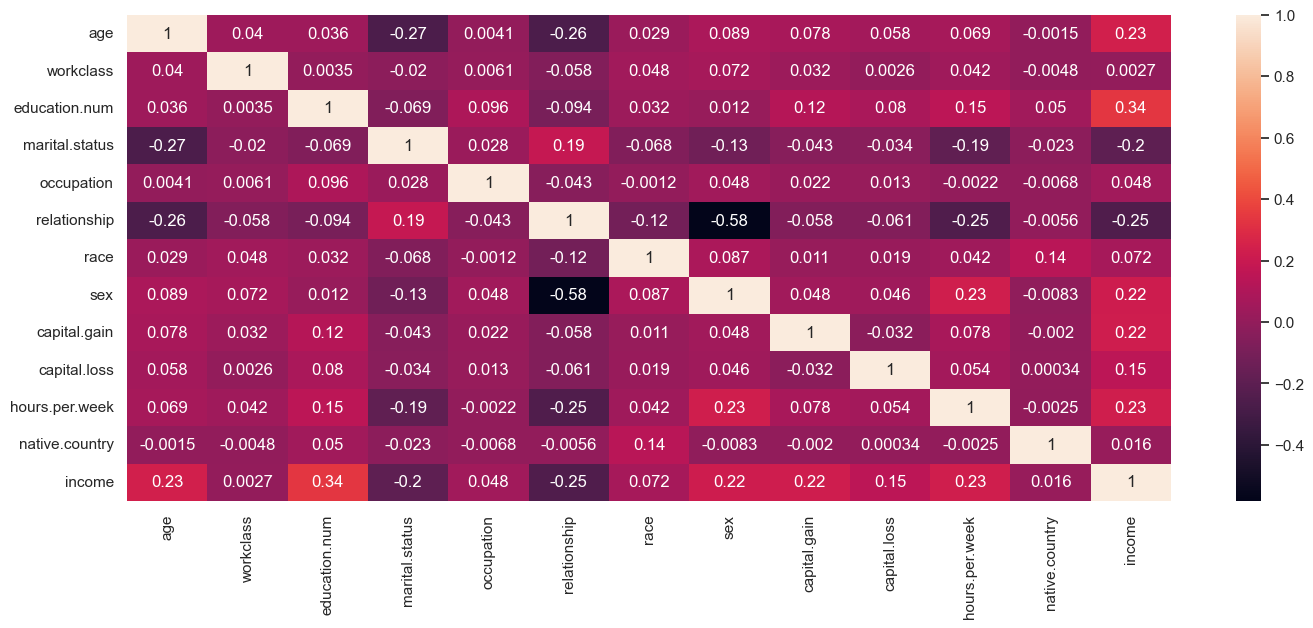

In [56]:
sns.heatmap(data.corr(),annot=True)

In [57]:
data.to_csv("cleandata,csv",index = False)

In [58]:
# model training

In [59]:
data.shape

(32537, 13)

In [60]:
# select dependent and independent features
x = data.drop("income",axis=1)
y = data["income"]

In [61]:
categorical_featues = x.select_dtypes(include="object").columns
numerical_featues = x.select_dtypes(exclude="object").columns
print(categorical_featues)
print(numerical_featues)

Index([], dtype='object')
Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country'],
      dtype='object')


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [63]:
num_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="medium")),
        ("scalar",StandardScaler())
    ]
)
# to standardize the data values into standard format

cato_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="medium")),
        ("scalar",StandardScaler())
    ]
)

# apply transorm to particular columns.
preprocessor = ColumnTransformer([
    ("num_pipeline",num_pipeline,numerical_features)
])

In [65]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26029, 12)
(6508, 12)
(26029,)
(6508,)


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [77]:
def performance_metrics(test,predict):
    confusionmatrix = print(f"CONFUSION_MATRIX: {confusion_matrix(test,predict)}")
    precision = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    return confusionmatrix,precision,recall,f1score,accuracyscore

In [80]:
# use hyperparameter tuning

In [82]:
lr = LogisticRegression()

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the estimator
lr = LogisticRegression()

# Define the parameter grid correctly
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Corrected from 'penality' to 'penalty'
    'solver': ['liblinear', 'saga']  # solvers that support L1 and elasticnet penalties
}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)

# Fit the grid search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [119]:
grid.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [121]:
grid.score(X_train,y_train)

0.824772369280418

In [123]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32537, dtype: int64

In [125]:
y_pred = grid.predict(X_test)

In [127]:
accuracy_score(y_test,y_pred)

0.8257529194837123

In [129]:
dr = DecisionTreeClassifier()

In [137]:
param_grid={
    "class_weight":["balanced"],
    "criterion":["gini","entropy","log_loss"],
    "splitter":["best","random"],
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"],
}

In [139]:
grid_search = GridSearchCV(estimator=dr,param_grid=param_grid,cv=5,scoring="accuracy")

In [141]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [143]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'log_loss',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'splitter': 'best'}

In [145]:
grid_search.score(X_train,y_train)

0.6903838026816244

In [147]:
y_pred = grid_search.predict(X_test)

In [149]:
accuracy_score(y_test,y_pred)

0.6787031346035648

In [151]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.61      0.74      4988
           1       0.41      0.92      0.57      1520

    accuracy                           0.68      6508
   macro avg       0.69      0.76      0.66      6508
weighted avg       0.83      0.68      0.70      6508



In [153]:
rf = RandomForestClassifier()

In [156]:
param_grid={
    "class_weight":["balanced"],
    "n_estimators":[20,50,30],
    "max_depth":[10,8,5],
    "min_samples_split":["2",5,10],
}

In [158]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring="accuracy")

In [160]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': ['2', 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [162]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_split': 10,
 'n_estimators': 50}

In [164]:
grid_search.score(X_train,y_train)

0.8209305005954897

In [170]:
y_pred = grid_search.predict(X_test)

In [172]:
accuracy_score(y_test,y_pred)

0.8050092194222496

In [174]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86      4988
           1       0.55      0.88      0.68      1520

    accuracy                           0.81      6508
   macro avg       0.75      0.83      0.77      6508
weighted avg       0.86      0.81      0.82      6508

